In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
df_sales=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


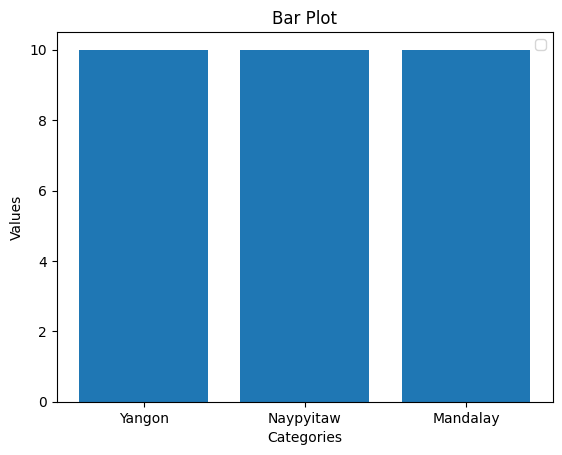

In [3]:
import matplotlib.pyplot as plt

# Sample data
categories = df_sales['City']
values = df_sales['Quantity']

# Create a bar plot
plt.bar(categories, values)
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()


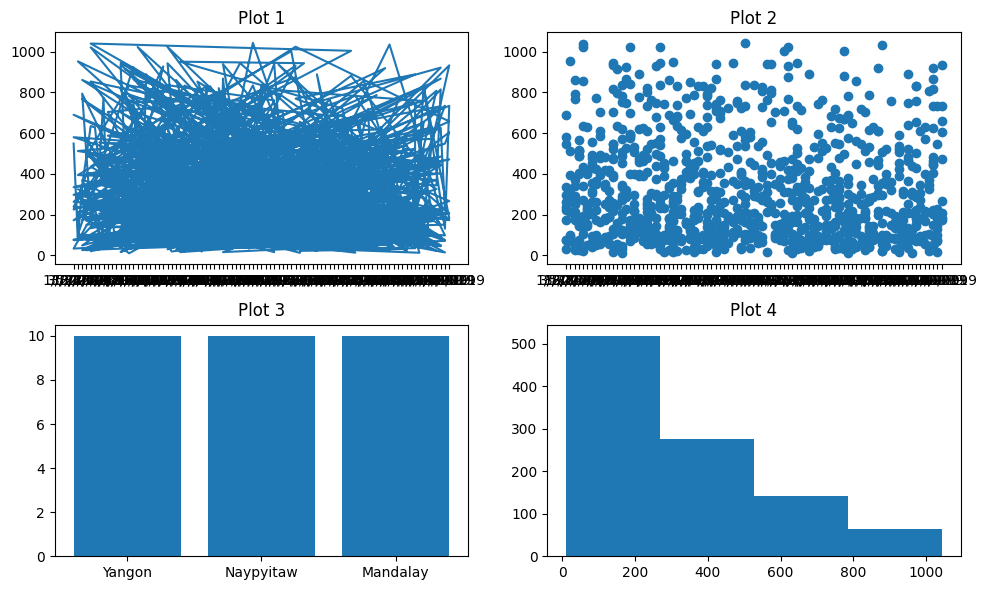

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

# Sample data
x = df_sales['Date']
y = df_sales['Total']
categories = df_sales['City']
values = df_sales['Quantity']
data = df_sales['Total']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Plot 1')

axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Plot 2')

axs[1, 0].bar(categories, values)
axs[1, 0].set_title('Plot 3')

axs[1, 1].hist(data, bins=4)
axs[1, 1].set_title('Plot 4')

plt.tight_layout()
plt.show()


In [5]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
gender_grp=df_sales.groupby('Gender').count()
gender_grp

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,,,,,,,,
Female,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
Male,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499


In [7]:
Rating_Pricegrp=df_sales.groupby(['Rating','Unit price']).count()
Rating_Pricegrp

Invoice ID  Branch  City  Customer type  Gender  \
Rating Unit price                                                    
4.0    23.65                1       1     1              1       1   
       46.41                1       1     1              1       1   
       48.52                1       1     1              1       1   
       51.13                1       1     1              1       1   
       52.35                1       1     1              1       1   
...                       ...     ...   ...            ...     ...   
10.0   24.74                1       1     1              1       1   
       32.32                1       1     1              1       1   
       52.79                1       1     1              1       1   
       55.07                1       1     1              1       1   
       93.39                1       1     1              1       1   

                   Product line  Quantity  Tax 5%  Total  Date  Time  Payment  \
Rating Unit price                                                               
4.0    23.65                  1         1       1      1     1     1        1   
       46.41                  1         1       1      1     1     1        1   
       48.52                  1         1       1      1     1     1        1   
       51.13                  1         1       1      1     1     1        1   
       52.35                  1         1       1      1     1     1        1   
...                         ...       ...     ...    ...   ...   ...      ...   
10.0   24.74                  1         1       1      1     1     1        1   
       32.32                  1         1       1      1     1     1        1   
       52.79                  1         1       1      1     1     1        1   
       55.07                  1         1       1      1     1     1        1   
       93.39                  1         1       1      1     1     1        1   

                   cogs  gross margin percentage  gross income  
Rating Unit price                                               
4.0    23.65          1                        1             1  
       46.41          1                        1             1  
       48.52          1                        1             1  
       51.13          1                        1             1  
       52.35          1                        1             1  
...                 ...                      ...           ...  
10.0   24.74          1                        1             1  
       32.32          1                        1             1  
       52.79          1                        1             1  
       55.07          1                        1             1  
       93.39          1                        1             1  

[1000 rows x 15 columns]

<Axes: xlabel='Rating,Unit price'>

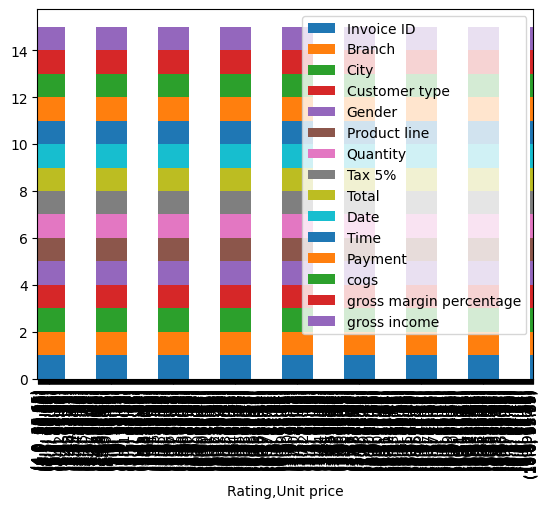

In [8]:
Rating_Pricegrp.plot(kind='bar',stacked=True)

In [9]:
payment_city_grp=df_sales.groupby(['Payment','City']).count()

payment_city_grp
 

Invoice ID  Branch  Customer type  Gender  \
Payment     City                                                   
Cash        Mandalay          110     110            110     110   
            Naypyitaw         124     124            124     124   
            Yangon            110     110            110     110   
Credit card Mandalay          109     109            109     109   
            Naypyitaw          98      98             98      98   
            Yangon            104     104            104     104   
Ewallet     Mandalay          113     113            113     113   
            Naypyitaw         106     106            106     106   
            Yangon            126     126            126     126   

                       Product line  Unit price  Quantity  Tax 5%  Total  \
Payment     City                                                           
Cash        Mandalay            110         110       110     110    110   
            Naypyitaw           124         124       124     124    124   
            Yangon              110         110       110     110    110   
Credit card Mandalay            109         109       109     109    109   
            Naypyitaw            98          98        98      98     98   
            Yangon              104         104       104     104    104   
Ewallet     Mandalay            113         113       113     113    113   
            Naypyitaw           106         106       106     106    106   
            Yangon              126         126       126     126    126   

                       Date  Time  cogs  gross margin percentage  \
Payment     City                                                   
Cash        Mandalay    110   110   110                      110   
            Naypyitaw   124   124   124                      124   
            Yangon      110   110   110                      110   
Credit card Mandalay    109   109   109                      109   
            Naypyitaw    98    98    98                       98   
            Yangon      104   104   104                      104   
Ewallet     Mandalay    113   113   113                      113   
            Naypyitaw   106   106   106                      106   
            Yangon      126   126   126                      126   

                       gross income  Rating  
Payment     City                             
Cash        Mandalay            110     110  
            Naypyitaw           124     124  
            Yangon              110     110  
Credit card Mandalay            109     109  
            Naypyitaw            98      98  
            Yangon              104     104  
Ewallet     Mandalay            113     113  
            Naypyitaw           106     106  
            Yangon              126     126

In [10]:
agg_pay_city=payment_city_grp.agg({'Customer type':['sum','mean']})

agg_pay_city
 

,Customer type
sum,1000.000000
mean,111.111111


In [11]:
pivot_payment = df_sales.pivot_table(index='Payment', values='gross income', aggfunc=['max','min','mean'])

pivot_payment
 

,max,min,mean
,gross income,gross income,gross income
Payment,,,
Cash,47.79,0.5085,15.532471
Credit card,49.65,0.6045,15.429042
Ewallet,49.26,0.6390,15.181933


<Axes: xlabel='Payment'>

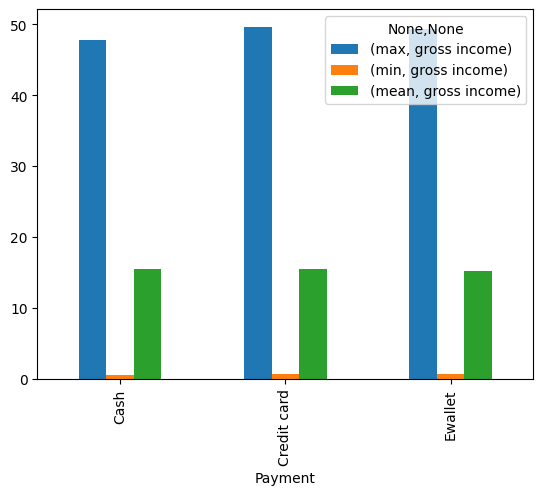

In [12]:
pivot_payment.plot(kind='bar')

<Figure size 1000x600 with 0 Axes>

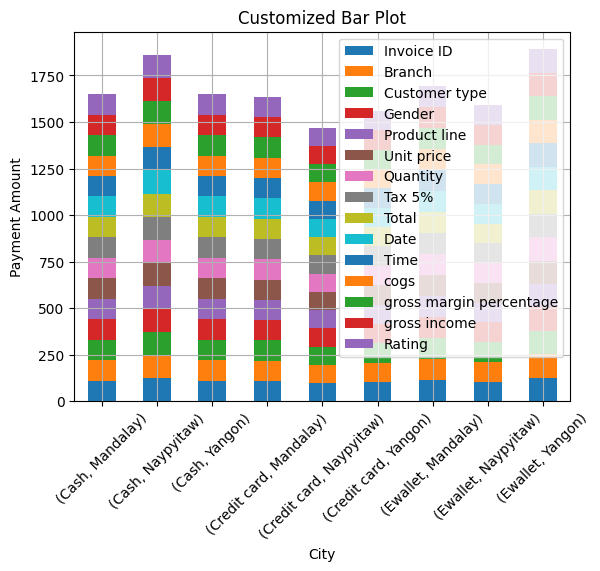

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = payment_city_grp.plot(kind='bar', stacked=True)
 
# Customizing the plot
ax.set_title('Customized Bar Plot')
ax.set_xlabel('City')
ax.set_ylabel('Payment Amount')
#ax.legend(title='Payment Type')
plt.xticks(rotation=45)
plt.grid(True)
 
plt.show()

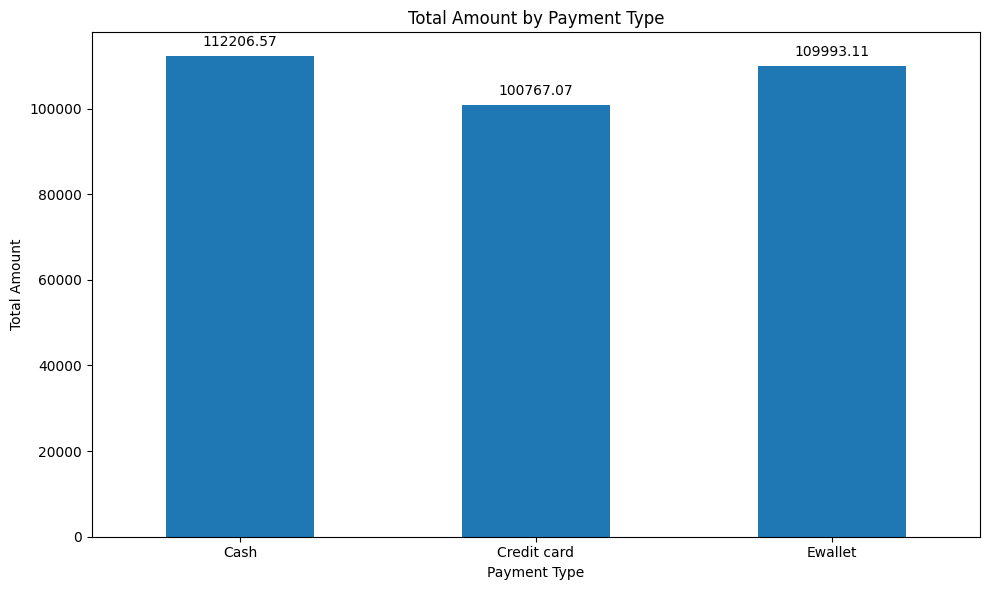

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

# Create a pivot table for payment types and their total amounts
pivot_payment = df_sales.pivot_table(values='Total', index='Payment', aggfunc='sum')

# Plot the pivot table as a bar chart
ax = pivot_payment.plot(kind='bar', figsize=(10, 6), legend=False)

# Customize the chart
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)

# Annotate the bars with the amounts
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


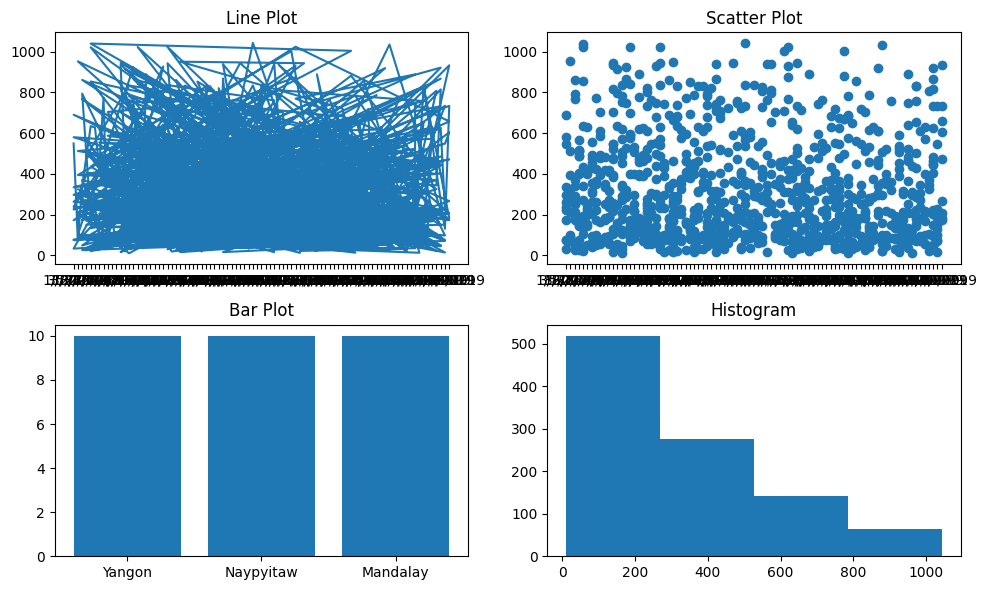

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

# Sample data
x = df_sales['Date']
y = df_sales['Total']
categories = df_sales['City']
values = df_sales['Quantity']
data = df_sales['Total']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Line Plot')

axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Scatter Plot')

axs[1, 0].bar(categories, values)
axs[1, 0].set_title('Bar Plot')

axs[1, 1].hist(data, bins=4)
axs[1, 1].set_title('Histogram')

plt.tight_layout()
plt.show()
